In [1]:
%matplotlib inline

In [1]:
from matplotlib import pyplot as plt

In [3]:
net = model_zoo.get_model('mask_rcnn_fpn_resnet101_v1d_coco', pretrained=True)

/opt/conda/lib/python3.6/site-packages/mxnet/gluon/block.py:1159: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


Model file is not found. Downloading.


240904KB [00:06, 35870.64KB/s]                            


In [4]:
from PIL import Image
import pandas as pd
import os
import numpy as np

In [5]:
image_file = os.listdir("../input/test/")

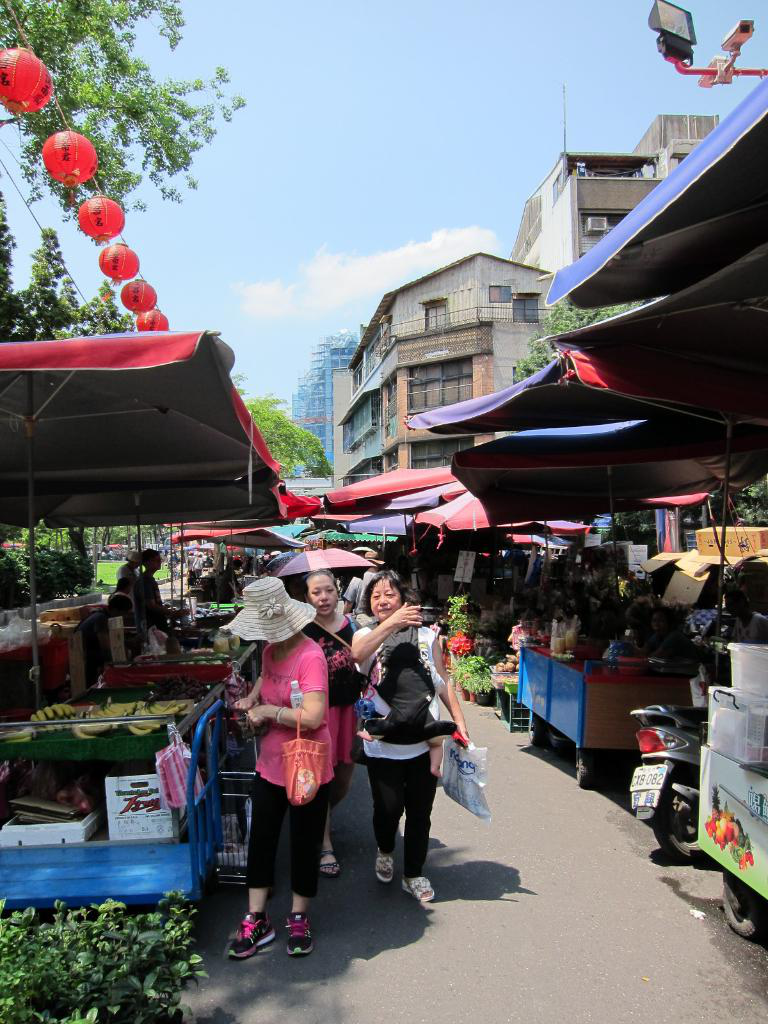

In [6]:
pth = '../input/test/'+image_file[84822]
Image.open(pth)

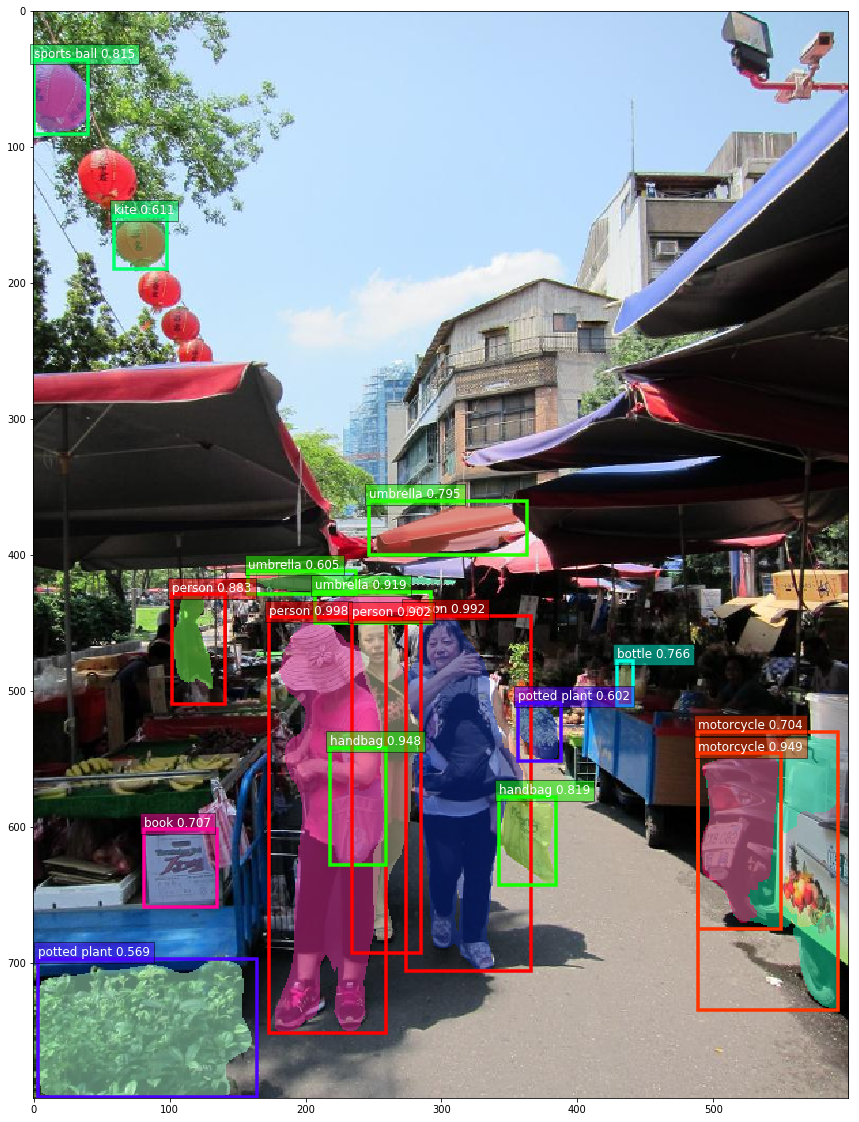

In [7]:
x, orig_img = data.transforms.presets.rcnn.load_test(pth)

ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

width, height = orig_img.shape[1], orig_img.shape[0]
masks = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
plt.show()